# ons manai 2lm2 tp1

# Simulation du jeux de LIDO simplifié

## Principe
On considére un jeux de Lido simple:
on dispose d'un un seul pion.

- Etape 0 :
Le pion doit sort de sa prison lorsqu'on obtient un 6.

- Etape 1 :
Le pion doit atteindre exactement une position cible situé à N pas de distance de sa prison 

Soit $X_n$ la variable aléatoire qui represente le nombre de coup nécéssaire pour atteindre la positions cible.

**Objectif 1** : Simuler le jeux 

**Objectif 2** : Calculer une estimation de l'éspérance mathématique de $X_n$ en utilisant `python`

**Objéctif 3** : Observer la variation de $\mathbb{E}(X_n)$ en fonction de $n$

<img src="LIDO.png">


In [10]:
import numpy as np

### Simulation du lancé de dé

In [11]:
def Roll():
    return int(np.random.choice(range(1,7),1))

In [12]:
Roll()

3

### Compléter le code et commenter

In [13]:
A=0 #prison
NA=0
S=10
 
temp=Roll()
NA+=1
print(NA,temp)
while (temp!=6):
    temp=Roll()
    NA+=1
    print(NA,temp)
    
A=1
print('sortie de la prison aprés{} coups'.format(NA))
print(NA,temp,A)
temp=Roll()
while A<S:
    temp=Roll()
    if temp+A<S:
        NA+=1
        A+=temp
        print(NA,temp,A)
    elif temp+A>S:
        NA+=1
        print(NA,temp,A)
    else:
      A=S
      NA+=1
      print(NA,temp,A)

    
        

1 4
2 2
3 3
4 6
sortie de la prison aprés4 coups
4 6 1
5 2 3
6 5 8
7 1 9
8 1 10


A : represente la position de pion 
NA : represente le nombre de coups .
S :represente la distance  entre le prison et le cible qu'elle est egal à 10.
premier boucle while nous donne le nombre de coups
et le deuxieme boucle while permet de tester la valeur temp+A avec S 
(il faut que temp+A < s ou temp+A = s pour que le pion se deplace sinon il reste a ca place )
et en meme temps pour chaque iteration NA+=1 .

In [14]:
def sim (S) : 
    A=0 #prison
    NA=0 #compteur 
    c=0
    temp = Roll()
    NA+=1
    while temp!=6 :  
        temp=Roll()
        NA+=1 
    A=1 
    while  A<S : 
        temp = Roll() 
        if temp+A<S : 
            NA+=1 
            A+=temp 
        elif temp+A>S : 
            NA+=1
        else :
            A=S
            NA+=1 
    return NA
        
    

sim(s): c'est une fonction qui prend comme variable le nombre de pas nécessaire pour atteindre la cible

In [15]:
sim(20)

7

In [16]:
#simulation 10000 fois n=30
L=[sim(30) for i in range(10000)]
Moy=sum(L)/10000
print('estimation de la moyenne de X_30={}'.format(Moy))

estimation de la moyenne de X_30=19.1271


In [18]:
x=list(range(10,20))
x
y=[sum([sim(u) for i in range(10000)])/10000 for u in x]

In [19]:
x

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [20]:
import matplotlib.pyplot as plt

In [21]:
y

[13.3713,
 13.5963,
 13.8763,
 14.1666,
 14.5361,
 14.7119,
 15.0468,
 15.1162,
 15.5842,
 16.0146]

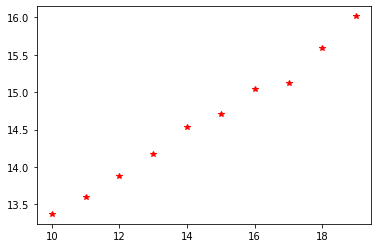

In [22]:
plt.plot(x,y,'*r')
plt.show()

In [23]:
from scipy import stats
import numpy as np
slope,intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [24]:
slope

0.2831569696969697

In [25]:
intercept

10.496253939393938

In [26]:
yy=[slope *u +intercept for u in x ]

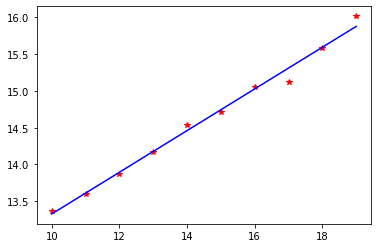

In [27]:
plt.plot(x,y,'*r',x,yy,'-b')

E(x_n)~ = 0.28*n+10.49
c'est une relation avec une regression linéaire 

### Simulation
Ecrire une foction `sim` qui simule le jeux et qui prend comme variable le nombre de pas $n$ nécessazire pour atteindre la cible

In [17]:
def sim(S):
    A=0
    NA=0
    c=0
    while (A<S) :
        pass
    return c
    

In [10]:
sim(20)

13

### Simulation de $10^5$  scénario 

In [ ]:
Freq=np.fromiter((sim(20) for i in range(10**5)),dtype=int)

In [148]:
ESP=Freq.sum()/10**5

16.17253

In [11]:
x=list(range(10,20))

In [14]:
y=[np.fromiter((sim(u) for i in range(5*10**4)),dtype=int).sum()/50000 for u in x]

In [15]:
import matplotlib.pyplot as plt

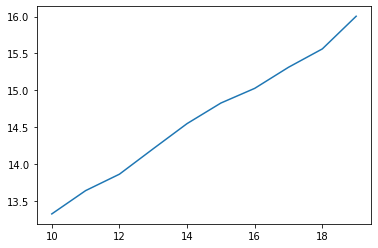

In [16]:
plt.plot(x,y)

In [17]:
from scipy import stats
import numpy as np
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)

In [18]:
slope

0.28871527272727254

In [19]:
intercept


10.443562545454547